## Importing Libraries

In [1]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns

In [2]:
train_df = pd.read_csv('SMS_train.csv', encoding='unicode_escape')
test_df = pd.read_csv('SMS_test.csv', encoding='unicode_escape')

In [3]:
train_df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


## Data Preprocessing

### Cleaning data

In [4]:
import re
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

train_df['cleaned_data'] = train_df['Message_body'].apply(clean_data)
test_df['cleaned_data'] = test_df['Message_body'].apply(clean_data)

In [5]:
train_df.head()

,S. No.,Message_body,Label,cleaned_data
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like i d...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that So any other suggest...
3,4,Will ü b going to esplanade fr home?,Non-Spam,Will b going to esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the 2nd time we have tried 2 contact u...


### Dropping Numbers

In [6]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

train_df['cleaned_data'] = train_df['cleaned_data'].apply(drop_numbers)
test_df['cleaned_data'] = test_df['cleaned_data'].apply(drop_numbers)

In [7]:
train_df.head()

,S. No.,Message_body,Label,cleaned_data
0,1,Rofl. Its true to its name,Non-Spam,Rofl Its true to its name
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,The guy did some bitching but I acted like i d...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,Pity was in mood for that So any other suggest...
3,4,Will ü b going to esplanade fr home?,Non-Spam,Will b going to esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,Spam,This is the nd time we have tried contact u U...


### Converting to Lower cases

In [8]:
import nltk
nltk.download('punkt')
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)
test_df['cleaned_data'] = test_df['cleaned_data'].apply(lower_case)
train_df['cleaned_data'] = train_df['cleaned_data'].apply(lower_case)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\f5481198\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\f5481198\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\f5481198\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Word Lemmetising

In [10]:
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

test_df['cleaned_data'] = test_df['cleaned_data'].apply(lemmatise)
train_df['cleaned_data'] = train_df['cleaned_data'].apply(lemmatise)

### Removing Stopwords

In [11]:
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

train_df['cleaned_data'] = train_df['cleaned_data'].apply(remove_stopword)
test_df['cleaned_data'] = test_df['cleaned_data'].apply(remove_stopword)

In [12]:
train_df.head()

,S. No.,Message_body,Label,cleaned_data
0,1,Rofl. Its true to its name,Non-Spam,rofl true name
1,2,The guy did some bitching but I acted like i'd...,Non-Spam,guy bitching acted like interested buying some...
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam,pity wa mood suggestion
3,4,Will ü b going to esplanade fr home?,Non-Spam,b going esplanade fr home
4,5,This is the 2nd time we have tried 2 contact u...,Spam,nd time tried contact u u pound prize claim ea...


In [13]:
test_df.head()

,S. No.,Message_body,Label,cleaned_data
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam,upgrdcentre orange customer may claim free cam...
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam,loan purpose homeowner tenant welcome previous...
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam,congrats nokia video camera phone call call co...
3,4,URGENT! Your Mobile number has been awarded wi...,Spam,urgent mobile number ha awarded prize guarante...
4,5,Someone has contacted our dating service and e...,Spam,someone ha contacted dating service entered ph...


# Model Building

### Splitting data into train and test data

In [14]:
X_train = train_df['cleaned_data']
y_train = train_df['Label']

In [15]:
X_train.head(5)

0                                       rofl true name
1    guy bitching acted like interested buying some...
2                              pity wa mood suggestion
3                            b going esplanade fr home
4    nd time tried contact u u pound prize claim ea...
Name: cleaned_data, dtype: object

In [16]:
X_test = test_df['cleaned_data']
y_test = test_df['Label']

In [17]:
X_test.head()

0    upgrdcentre orange customer may claim free cam...
1    loan purpose homeowner tenant welcome previous...
2    congrats nokia video camera phone call call co...
3    urgent mobile number ha awarded prize guarante...
4    someone ha contacted dating service entered ph...
Name: cleaned_data, dtype: object

In [18]:
y_test.head()

0    Spam
1    Spam
2    Spam
3    Spam
4    Spam
Name: Label, dtype: object

### Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test= le.fit_transform(y_test)


In [20]:
y_train

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

### Initialize Vectorizers

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [22]:
# Fit and transform training data with vectorizers
X_train_count = count_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [23]:
# Combine vectorized features
X_train_combined = pd.concat([pd.DataFrame(X_train_count.toarray()), pd.DataFrame(X_train_tfidf.toarray())], axis=1)
X_test_combined = pd.concat([pd.DataFrame(X_test_count.toarray()), pd.DataFrame(X_test_tfidf.toarray())], axis=1)

In [24]:
X_train_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_test_combined.head()

,0,1,2,3,4,5,6,7,8,9,...,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## SVM Model

In [26]:
from sklearn.svm import SVC
svm_model = SVC(random_state=0, kernel='linear')
svm_model.fit(X_train_combined, y_train)

SVC(kernel='linear', random_state=0)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
y_pred = svm_model.predict(X_test_combined)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results= model_results


In [28]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.888,1.0,0.815789,0.898551


Test Data Accuracy: 0.8880


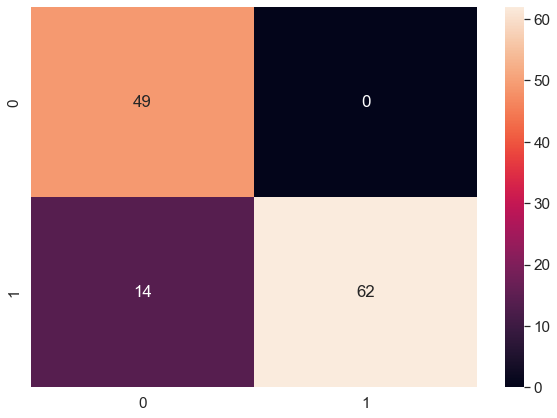

In [29]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [30]:
X_train_combined

,0,1,2,3,4,5,6,7,8,9,...,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
953,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
954,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### SVC RBF

In [31]:
from sklearn.svm import SVC
svm_modelRBF = SVC(random_state=0, kernel='rbf')
svm_modelRBF.fit(X_train_combined, y_train)

SVC(random_state=0)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
y_pred = svm_modelRBF.predict(X_test_combined)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (rbf)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_30668\148624100.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [33]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.888,1.0,0.815789,0.898551
1,SVM (rbf),0.728,1.0,0.552632,0.711864


Test Data Accuracy: 0.7280


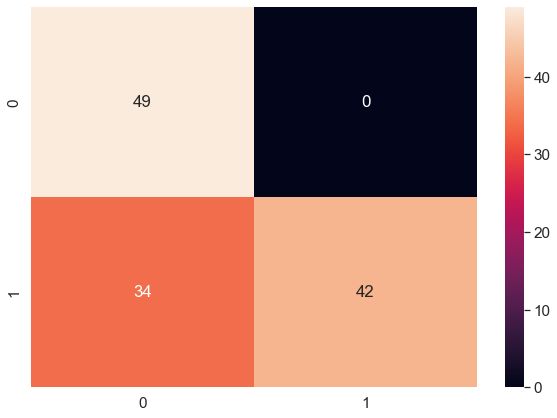

In [34]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
RFC_classifier= RandomForestClassifier(random_state=0, n_estimators =100, criterion ='entropy')
RFC_classifier.fit(X_train_combined,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [36]:
y_pred = RFC_classifier.predict(X_test_combined)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results = results.append(model_results, ignore_index = True)

C:\Users\f5481198\AppData\Local\Temp\ipykernel_30668\4108832434.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(model_results, ignore_index = True)


In [37]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM (Linear),0.888,1.0,0.815789,0.898551
1,SVM (rbf),0.728,1.0,0.552632,0.711864
2,Random Forest (n=100),0.808,1.0,0.684211,0.812500


Test Data Accuracy: 0.8080


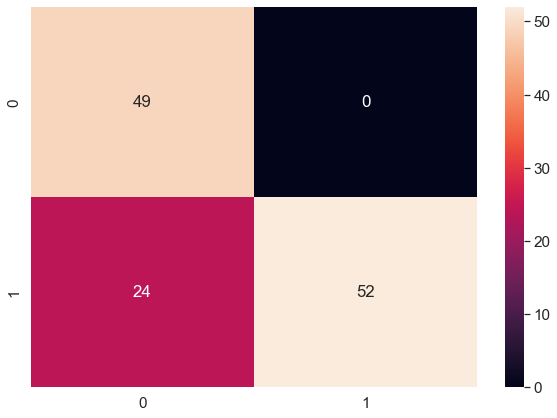

In [38]:
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

## Hyperparameter Tuning

### Grid Search CV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
parameters_SVC = {"kernel": ["linear","rbf"],"C":[0.1,1,10]}

In [41]:
SVC_grid = GridSearchCV(svm_model,param_grid=parameters_SVC,cv=3,scoring='accuracy')

In [44]:
SVC_grid_model = SVC_grid.fit(X_train_combined, y_train)

In [45]:
y_pred_grid= SVC_grid_model.predict(X_test_combined)

#### Results

In [47]:
best_hyperarameters = SVC_grid_model.best_params_
best_score = SVC_grid_model.best_score_
Accuracy = accuracy_score(y_test,y_pred_grid)
grid_results = pd.DataFrame([[best_hyperarameters, best_score, Accuracy]],
               columns = ['Best Hyperparameters','Best score','Accuracy'])

In [48]:
grid_results

,Best Hyperparameters,Best score,Accuracy
0,"{'C': 0.1, 'kernel': 'linear'}",0.965517,0.88


### Random Search CV

In [49]:
from sklearn.model_selection import RandomizedSearchCV


In [51]:
parameters_SVC = {"kernel": ["linear","rbf"],"C":[0.1,1,10]}
n_iteration = 5

In [52]:
SVC_random = RandomizedSearchCV(svm_model,param_distributions=parameters_SVC,n_iter=n_iteration,cv=3,scoring='accuracy')

In [53]:
SVC_random_model = SVC_random.fit(X_train_combined, y_train)

In [54]:
y_pred_random= SVC_random_model.predict(X_test_combined)

#### Results

In [56]:
best_hyperarameters = SVC_random_model.best_params_
best_score = SVC_random_model.best_score_
Accuracy = accuracy_score(y_test,y_pred_random)
random_results = pd.DataFrame([[best_hyperarameters, best_score, Accuracy]],
               columns = ['Best Hyperparameters','Best score','Accuracy'])

In [57]:
random_results

,Best Hyperparameters,Best score,Accuracy
0,"{'kernel': 'linear', 'C': 1}",0.964472,0.888
